# XGBoost Classifier on the cleaned Credit Score dataset

Imports

In [14]:
import pickle
import pandas as pd
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Loading Dataset

In [3]:
x_train = pd.read_csv("../Dataset//x_train.csv")
y_train = pd.read_csv("../Dataset//y_train.csv")

x_test = pd.read_csv("../Dataset//x_test.csv")
y_test = pd.read_csv("../Dataset//y_test.csv")

Fitting Model

In [7]:
model = xgb.XGBClassifier(booster="dart")
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

Performance Metrics

              precision    recall  f1-score   support

           0       0.70      0.71      0.70       353
           1       0.70      0.45      0.55       169
           2       0.80      0.85      0.83       884

    accuracy                           0.77      1406
   macro avg       0.73      0.67      0.69      1406
weighted avg       0.76      0.77      0.76      1406


Accuracy: 0.767425320056899
Precision: 0.7338519761637884
Recall: 0.6704770112279118
F1: 0.6925791729530792


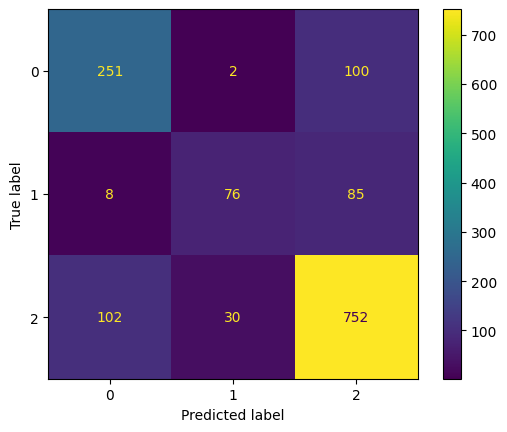

In [12]:
y_pred = model.predict(x_test)

# y_val = model.predict(x_train)
# print(classification_report(y_train, y_val))

print(classification_report(y_test, y_pred,zero_division=1))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average="macro")
recall = recall_score(y_test, y_pred,average="macro")
f1 = f1_score(y_test, y_pred,average="macro")


print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)


cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

Importing Model as pickle

In [16]:
pickle.dump(model, open('../Models//xgb.pkl', 'wb'))